In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, zscore
import numpy as np
from wordcloud import WordCloud

# Data Understanding

In [2]:
org = pd.read_csv('/Users/kexinz8/Downloads/state_CA-IL.csv')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44,46) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
org.shape

(4310938, 99)

In [4]:
actionDic = {1:'Approve', 2:'Approve', 5:'Approve', 6:'Approve', 8:'Approve', 3:'Reject', 7:'Reject', 4:"withdrawn"}
org = org.replace({"action_taken": actionDic})
org.shape

(4310938, 99)

# Comparisons of CA and IL approved cases

In [106]:
aprv = org[org['action_taken'] == 'Approve']
aprv.shape

(3266780, 99)

### Approval rate

In [107]:
aprv[['state_code', 'action_taken']].isnull().sum()

state_code      0
action_taken    0
dtype: int64

In [108]:
contigency = pd.crosstab(org['state_code'], org['action_taken'], normalize='index')
contigency

action_taken,Approve,Reject,withdrawn
state_code,,,
CA,0.755083,0.101167,0.143751
IL,0.768435,0.101337,0.130228


Chi-Sqaure test of independence

In [109]:
c, p, dof, expected = chi2_contingency(contigency)
p

0.9996077910517854

The p-value is 99.96% which means that we do not reject the null hypothesis at 95% level of confidence.

### Characteristics of Loan

#### Loan Amount

In [110]:
aprv['loan_amount'].isnull().sum()

0

In [111]:
aprv.groupby('state_code')['loan_amount'].describe()

,count,mean,std,min,25%,50%,75%,max
state_code,,,,,,,,
CA,2595384.0,451472.995903,1.308835e+06,5000.0,265000.0,385000.0,515000.0,711005000.0
IL,671396.0,248850.216564,5.555550e+05,5000.0,135000.0,205000.0,305000.0,165605000.0


<AxesSubplot:xlabel='state_code', ylabel='loan_amount'>

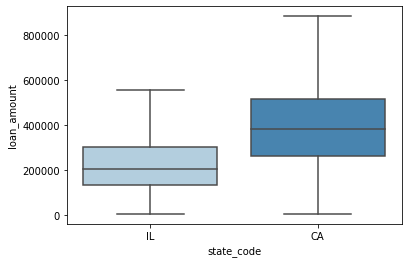

In [112]:
sns.boxplot(data=aprv, x="state_code", y="loan_amount", showfliers = False, palette="Blues")

### Interest Rate

In [113]:
aprv['interest_rate'].isnull().sum()

219346

In [114]:
tmp=aprv[aprv['interest_rate'] != 'Exempt']
tmp['interest_rate'] = tmp['interest_rate'].astype(float)
tmp.groupby('state_code')['interest_rate'].describe()

/var/folders/qv/rxdwppfn7vs0fnsc3154yt9c0000gn/T/ipykernel_2184/2079478058.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['interest_rate'] = tmp['interest_rate'].astype(float)


,count,mean,std,min,25%,50%,75%,max
state_code,,,,,,,,
CA,2401127.0,3.206369,15.509907,0.0,2.75,3.000,3.5,23625.0
IL,598473.0,3.292333,4.432735,0.0,2.75,3.125,3.5,900.0


<AxesSubplot:xlabel='state_code', ylabel='interest_rate'>

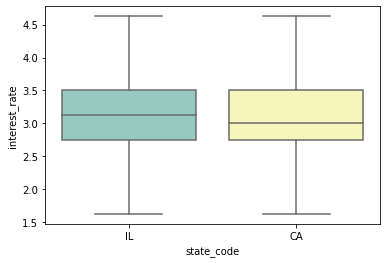

In [115]:
sns.boxplot(data=tmp, x="state_code", y="interest_rate", showfliers = False, palette="Set3")

### Loan term

In [116]:
tmp=aprv[aprv['loan_term'] != 'Exempt']
tmp['loan_term'] = tmp['loan_term'].astype(float)
tmp.groupby('state_code')['loan_term'].describe()

/var/folders/qv/rxdwppfn7vs0fnsc3154yt9c0000gn/T/ipykernel_2184/3817864054.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['loan_term'] = tmp['loan_term'].astype(float)


,count,mean,std,min,25%,50%,75%,max
state_code,,,,,,,,
CA,2561416.0,332.541187,221.432701,1.0,360.0,360.0,360.0,339000.0
IL,634589.0,311.212733,82.813307,1.0,240.0,360.0,360.0,3660.0


### Customer side

#### Who are they?

<AxesSubplot:ylabel='applicant_age'>

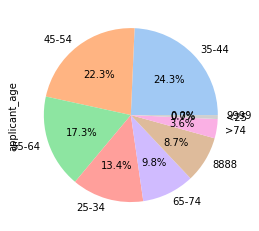

In [289]:
# Age - CA
d=aprv[aprv['state_code']=='CA']['applicant_age'].value_counts()
palette_color = sns.color_palette('pastel')
d.plot.pie(autopct="%.1f%%", colors = palette_color)

<AxesSubplot:ylabel='applicant_age'>

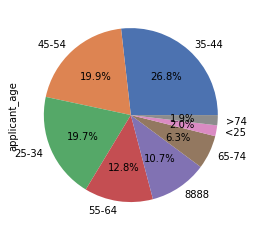

In [118]:
# Age - IL
d=aprv[aprv['state_code']=='IL']['applicant_age'].value_counts()
palette_color = sns.color_palette('deep')
d.plot.pie(autopct="%.1f%%", colors = palette_color)

In [290]:
# Race
tmp = aprv[aprv['derived_race']!='Race Not Available']
cross_tab = pd.crosstab(index=tmp['state_code'], columns=tmp['derived_race'], normalize="index")
cross_tab

derived_race,2 or more minority races,American Indian or Alaska Native,Asian,Black or African American,Free Form Text Only,Joint,Native Hawaiian or Other Pacific Islander,White
state_code,,,,,,,,
CA,0.002037,0.005840,0.204973,0.037469,0.000113,0.040530,0.005070,0.703968
IL,0.000938,0.002895,0.076290,0.056547,0.000030,0.019366,0.001026,0.842909


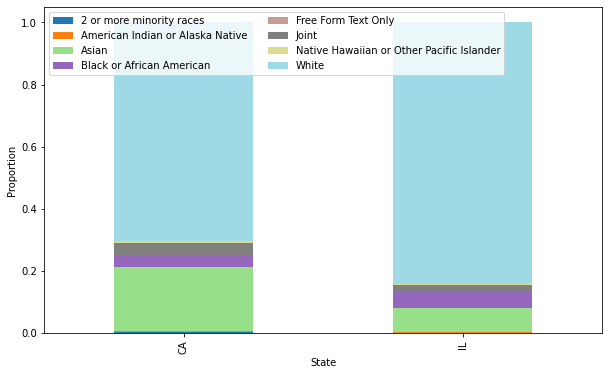

In [292]:
cross_tab.plot(kind='bar', 
                stacked=True, 
                colormap='tab20', 
                figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("State")
plt.ylabel("Proportion")
plt.show()

#### Lender credits

In [121]:
tmp=aprv[aprv['lender_credits']!='Exempt']
tmp['lender_credits'] = tmp['lender_credits'].astype(float)
tmp.groupby('state_code')[['lender_credits']].describe()

/var/folders/qv/rxdwppfn7vs0fnsc3154yt9c0000gn/T/ipykernel_2184/138340445.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['lender_credits'] = tmp['lender_credits'].astype(float)


lender_credits                                                    \
                    count         mean          std   min      25%      50%   
state_code                                                                    
CA               893066.0  1925.175219  2456.708811  0.01  296.690  1245.00   
IL               239971.0  1208.510106  2740.017994  0.01  176.145   619.56   

                                 
                 75%        max  
state_code                       
CA          2946.000  678000.00  
IL          1751.535  464258.09

<AxesSubplot:xlabel='state_code', ylabel='lender_credits'>

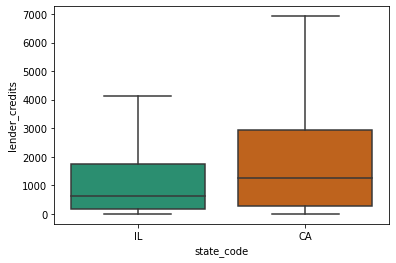

In [122]:
sns.boxplot(data=tmp, x="state_code", y="lender_credits", showfliers = False, palette="Dark2")

#### Income

In [295]:
aprv.groupby('state_code')[['income']].describe()

income                                                         \
                count        mean           std      min   25%    50%    75%   
state_code                                                                     
CA          2199025.0  753.081132  10328.589431 -10063.0  84.0  125.0  188.0   
IL           567791.0  254.298603   5166.685762 -25785.0  66.0  101.0  154.0   

                       
                  max  
state_code             
CA          3861652.0  
IL          1982668.0

<AxesSubplot:xlabel='state_code', ylabel='income'>

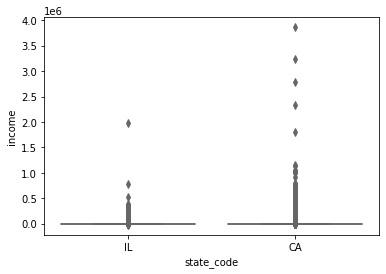

In [298]:
sns.boxplot(data=aprv, x="state_code", y="income", palette="spring")

#### Why did they come?

In [124]:
purpDic = {1: "Home purchase", 2: "Home improvement", 31: "Refinancing", 32: "Cash-out refinancing", 4: "Other purpose", 5: "Not applicable"}
aprv = aprv.replace({"loan_purpose": purpDic})

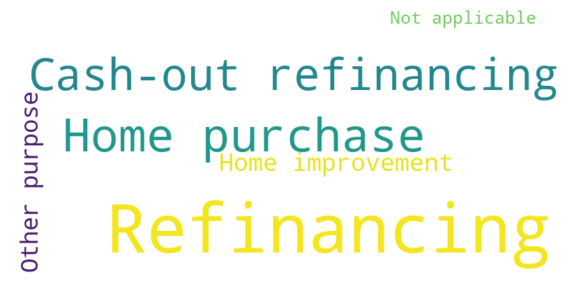

In [125]:
# Loan_purpose - CA
d = aprv[aprv['state_code']=='CA']['loan_purpose'].value_counts()
wc = WordCloud(width=800, height=400, max_words=200, background_color='white').generate_from_frequencies(d)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

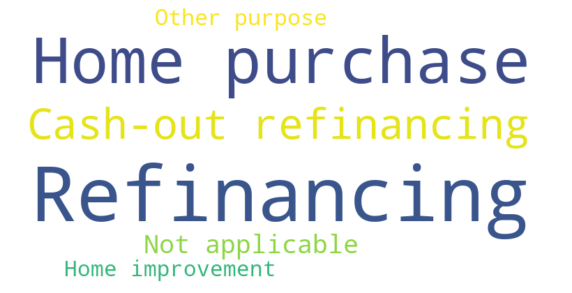

In [126]:
# Loan_purpose - IL
d = aprv[aprv['state_code']=='IL']['loan_purpose'].value_counts()
wc = WordCloud(width=800, height=400, max_words=200, background_color='white').generate_from_frequencies(d)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

#### What do they want

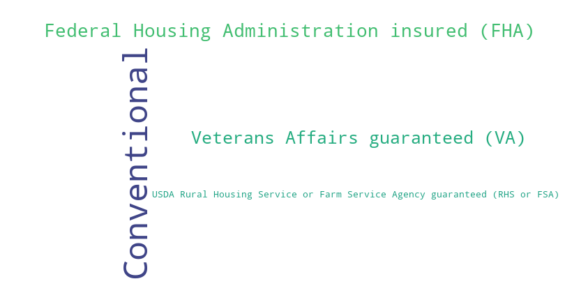

In [147]:
# Loan_product - CA
typeDic = {1: "Conventional", 2: "Federal Housing Administration insured (FHA)", 3:"Veterans Affairs guaranteed (VA)", 4: "USDA Rural Housing Service or Farm Service Agency guaranteed (RHS or FSA)"}
aprv = aprv.replace({"loan_type": typeDic})


d = aprv[aprv['state_code']=='CA']['loan_type'].value_counts()
wc = WordCloud(width=800, height=400, max_words=200, background_color='white').generate_from_frequencies(d)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


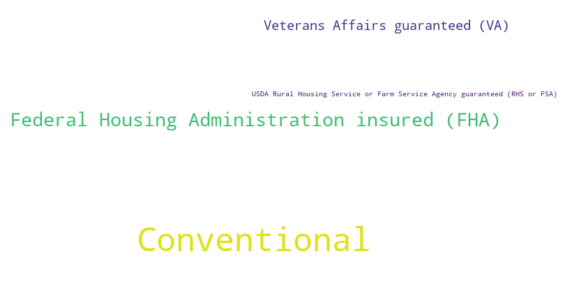

In [145]:
# Loan_product - IL
d = aprv[aprv['state_code']=='IL']['loan_type'].value_counts()
wc = WordCloud(width=800, height=400, max_words=200, background_color='white').generate_from_frequencies(d)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# Binary prediction modeling

## Data Wrangling

Missing values check

<AxesSubplot:xlabel='index'>

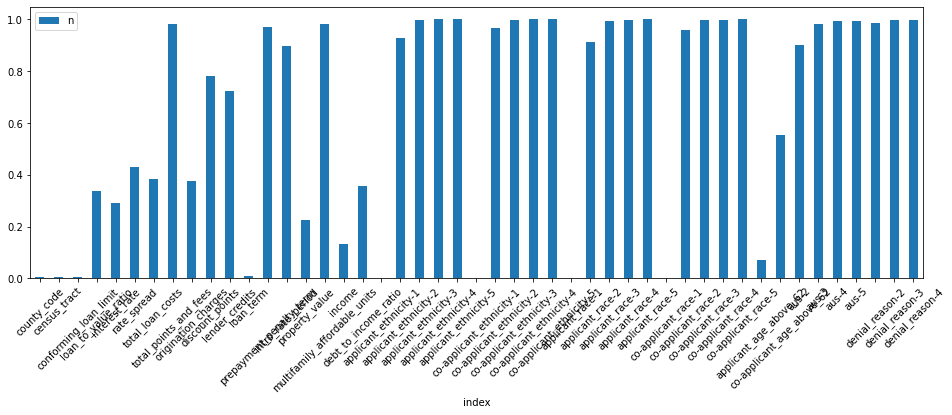

In [300]:
nas = org.isna().sum()
nas = nas[nas.values !=0]/org.shape[0]
nas.reset_index(name="n").plot.bar(x='index', y='n', rot=45, figsize=(16, 5))

In [299]:
org[org['state_code']=='IL'].shape

(873719, 99)

In [303]:
nas.shape

(47,)

In [302]:
nas.keys

<bound method Series.keys of county_code                     0.003914
census_tract                    0.004461
conforming_loan_limit           0.003459
loan_to_value_ratio             0.339127
interest_rate                   0.290643
rate_spread                     0.431813
total_loan_costs                0.382997
total_points_and_fees           0.981957
origination_charges             0.377753
discount_points                 0.783175
lender_credits                  0.723468
loan_term                       0.009278
prepayment_penalty_term         0.969908
intro_rate_period               0.896701
property_value                  0.224170
multifamily_affordable_units    0.984038
income                          0.134106
debt_to_income_ratio            0.358068
applicant_ethnicity-1           0.000331
applicant_ethnicity-2           0.929945
applicant_ethnicity-3           0.998840
applicant_ethnicity-4           0.999964
applicant_ethnicity-5           0.999991
co-applicant_ethnicity-1    

Step 1: Delete at and after loan indicators that do not affect modeling

In [5]:
df = org.drop(['total_loan_costs', 'total_points_and_fees', 'discount_points', 'prepayment_penalty_term',\
                    'intro_rate_period', 'lender_credits'], axis=1)
df.shape                    

(4310938, 93)

Step 2: Delete Additional Information / Already Integrated

In [6]:
df = df.drop(['applicant_ethnicity-1', 'applicant_ethnicity-2', 'applicant_ethnicity-3', 'applicant_ethnicity-4',\
                'applicant_ethnicity-5', 'co-applicant_ethnicity-1', 'co-applicant_ethnicity-2', 'co-applicant_ethnicity-3',\
                'co-applicant_ethnicity-4', 'co-applicant_ethnicity-5', 'denial_reason-2', 'denial_reason-3', 'denial_reason-4',\
                 'aus-2', 'aus-3', 'aus-4', 'aus-5', 'applicant_race-1', 'applicant_race-2', 'applicant_race-3', 'applicant_race-4',\
                'applicant_race-5', 'co-applicant_race-1', 'co-applicant_race-2','co-applicant_race-3', 'co-applicant_race-4',\
                 'co-applicant_race-5', 'multifamily_affordable_units', 'rate_spread', 'origination_charges'], axis=1)
df.shape

(4310938, 63)

Step 3: Delete variables do not have an impact on loan decision

In [7]:
df = df.drop(['county_code', 'census_tract', 'applicant_age_above_62', 'co-applicant_age_above_62'], axis=1)
df.shape

(4310938, 59)

Step 4: Imputation for variables of interest

In [8]:
nas = df.isna().sum()
nas[nas.values!=0]/df.shape[0]

conforming_loan_limit    0.003459
loan_to_value_ratio      0.339127
interest_rate            0.290643
loan_term                0.009278
property_value           0.224170
income                   0.134106
debt_to_income_ratio     0.358068
dtype: float64

In [9]:
# Continuous variables -- median
df['loan_to_value_ratio'].fillna(df[df['loan_to_value_ratio']!='Exempt']['loan_to_value_ratio'].median(), inplace=True)
df['interest_rate'].fillna(df[df['interest_rate']!='Exempt']['interest_rate'].median(), inplace=True)
df['loan_term'].fillna(df[df['loan_term']!='Exempt']['loan_term'].median(), inplace=True)
df['property_value'].fillna(df[df['property_value']!='Exempt']['property_value'].median(), inplace=True)
df['income'].fillna(df[df['income']!='Exempt']['income'].median(), inplace=True)

In [10]:
# categorical variables -- mode
df['conforming_loan_limit'].fillna(df[df['conforming_loan_limit']!='Exempt']['conforming_loan_limit'].mode()[0], inplace=True)
df['debt_to_income_ratio'].fillna(df[df['debt_to_income_ratio']!='Exempt']['debt_to_income_ratio'].mode()[0], inplace=True)

In [11]:
# No more NAs
t=df.isna().sum()
t[t.values!=0]/df.shape[0]

Series([], dtype: float64)

### Feature Engineering

In [136]:
df.columns

Index(['activity_year', 'lei', 'derived_msa-md', 'state_code',
       'conforming_loan_limit', 'derived_loan_product_type',
       'derived_dwelling_category', 'derived_ethnicity', 'derived_race',
       'derived_sex', 'action_taken', 'purchaser_type', 'preapproval',
       'loan_type', 'loan_purpose', 'lien_status', 'reverse_mortgage',
       'open-end_line_of_credit', 'business_or_commercial_purpose',
       'loan_amount', 'loan_to_value_ratio', 'interest_rate', 'hoepa_status',
       'loan_term', 'negative_amortization', 'interest_only_payment',
       'balloon_payment', 'other_nonamortizing_features', 'property_value',
       'construction_method', 'occupancy_type',
       'manufactured_home_secured_property_type',
       'manufactured_home_land_property_interest', 'total_units', 'income',
       'debt_to_income_ratio', 'applicant_credit_score_type',
       'co-applicant_credit_score_type', 'applicant_ethnicity_observed',
       'co-applicant_ethnicity_observed', 'applicant_race_ob

#### Based on rule-of-thumb / industrial expertise, select variables from several aspects

Step 0: Illinois; Action_taken 0/1

In [12]:
base = df[df['action_taken'].isin(['Approve', 'Reject'])]

In [13]:
base = base[base['state_code'] == 'IL']

In [14]:
base.shape

(759936, 59)

In [15]:
base['applicant_credit_score_type'].unique()

array([   1,    2,    3,    9, 1111,    7,    6,    8,    4,    5])

Step 1: Key factors affecting loan decision
Step 2: Applicants/loan/property/transaction

In [16]:
m1 = base[['loan_type','action_taken', 'debt_to_income_ratio', 'loan_to_value_ratio', 'income', 'hoepa_status', 'loan_amount']]

In [17]:
m1 = m1[m1['loan_type'] == 1]
m1.shape

(614620, 7)

In [18]:
len(m1[m1['loan_to_value_ratio']=='Exempt'])/614620

0.06137288080439947

In [19]:
tmp=m1[m1['loan_to_value_ratio']!='Exempt']

In [20]:
tmp=tmp[tmp['debt_to_income_ratio']!='Exempt']

In [21]:
tmp.shape

(576869, 7)

Data type transformation

In [22]:
tmp.columns

Index(['loan_type', 'action_taken', 'debt_to_income_ratio',
       'loan_to_value_ratio', 'income', 'hoepa_status', 'loan_amount'],
      dtype='object')

In [23]:
tmp[['action_taken','hoepa_status']] = tmp[['action_taken','hoepa_status']].apply(lambda x: pd.factorize(x)[0])
tmp['loan_to_value_ratio']=tmp['loan_to_value_ratio'].astype(float)

#### Model establishment

In [24]:
def ordy(table, column):
    keys = sorted(table[column].unique())
    values = list(range(len(keys)))
    res = dict(map(lambda i,j : (i,j) , keys,values))
    table[column] = table[column].replace(res)

In [25]:
ordy(tmp, 'debt_to_income_ratio')

In [26]:
m1

,loan_type,action_taken,debt_to_income_ratio,loan_to_value_ratio,income,hoepa_status,loan_amount
0,1,Approve,45,54.215,173.0,2,175000.0
4,1,Reject,20%-<30%,68.653,124.0,3,135000.0
5,1,Approve,20%-<30%,55.227,315.0,2,345000.0
14,1,Reject,>60%,63.043,7.0,3,135000.0
23,1,Approve,<20%,70.412,171.0,2,185000.0
...,...,...,...,...,...,...,...
4310929,1,Approve,30%-<36%,95.0,27.0,2,75000.0
4310930,1,Approve,20%-<30%,90.0,126.0,2,385000.0
4310933,1,Approve,30%-<36%,76.923,173.0,2,205000.0
4310936,1,Approve,30%-<36%,75.0,94.0,3,95000.0


In [27]:
tmp

,loan_type,action_taken,debt_to_income_ratio,loan_to_value_ratio,income,hoepa_status,loan_amount
0,1,0,11,54.215,173.0,0,175000.0
4,1,1,0,68.653,124.0,1,135000.0
5,1,0,0,55.227,315.0,0,345000.0
14,1,1,18,63.043,7.0,1,135000.0
23,1,0,17,70.412,171.0,0,185000.0
...,...,...,...,...,...,...,...
4310929,1,0,1,95.000,27.0,0,75000.0
4310930,1,0,0,90.000,126.0,0,385000.0
4310933,1,0,1,76.923,173.0,0,205000.0
4310936,1,0,1,75.000,94.0,1,95000.0


##### outliers

In [305]:
import numpy as np
from scipy import stats
tmp[(np.abs(stats.zscore(tmp)) < 3).all(axis=1)]

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(tmp.drop('action_taken',axis=1), 
                                                    tmp['action_taken'], test_size=0.30, 
                                                    random_state=101)
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [36]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [48]:
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

0.295301522588562

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96    151984
           1       0.72      0.62      0.67     21077

    accuracy                           0.92    173061
   macro avg       0.84      0.79      0.81    173061
weighted avg       0.92      0.92      0.92    173061



#### Correlation between variables

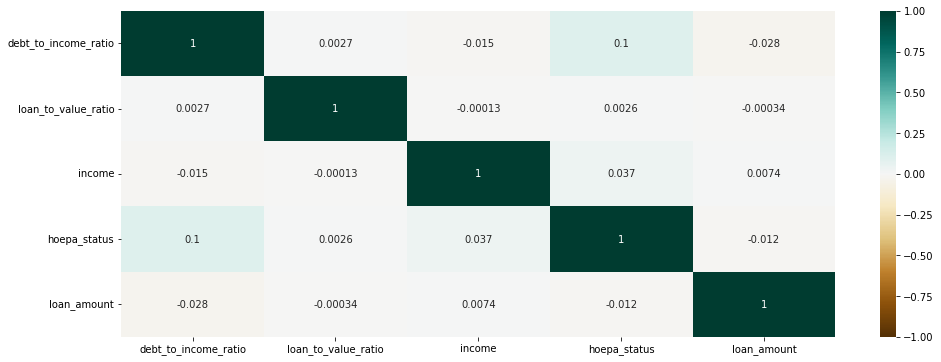

In [38]:
plt.figure(figsize=(16, 6))
hm=sns.heatmap(tmp.drop(['loan_type',	'action_taken'],axis=1).corr(),vmin=-1, vmax=1, annot=True, cmap='BrBG')

### SVM

In [ ]:
from sklearn.pipeline import make_pipeline


In [39]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

X_train, X_test, y_train, y_test = train_test_split(tmp.drop('action_taken',axis=1), 
                                                    tmp['action_taken'], test_size=0.30, 
                                                    random_state=101)

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)

: 

In [ ]:
print(classification_report(y_test,clf.predict(X_test)))

### Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(X_train, y_train)
print(classification_report(y_test,rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96    151984
           1       0.75      0.57      0.65     21077

    accuracy                           0.92    173061
   macro avg       0.85      0.77      0.80    173061
weighted avg       0.92      0.92      0.92    173061



### Adaboosting

In [31]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [62]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=0.8
                          )
# Train Adaboost Classifer
abcmodel = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = abcmodel.predict(X_test)

In [57]:
# 0.4 & 0.3
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97    151984
           1       0.72      0.87      0.78     21077

    accuracy                           0.94    173061
   macro avg       0.85      0.91      0.87    173061
weighted avg       0.95      0.94      0.94    173061



In [61]:
# 0.6
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96    151984
           1       0.68      0.91      0.78     21077

    accuracy                           0.94    173061
   macro avg       0.83      0.92      0.87    173061
weighted avg       0.95      0.94      0.94    173061

